2.5. The other way the json trump data was used is that we can try and check which countries does he mention the most. This is done by checking how many times he actually types out the country name in his tweet. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fname = 'trump_data.json'
trump_df=pd.read_json(fname)
word_count_df=trump_df.text.str.split(expand=True).stack().value_counts()


In [2]:
word_count_df.to_csv('word_count_df')

In [3]:
word_count=pd.read_csv('word_count_df',names=['Word','Frequency'])

In [4]:
word_count.head()
word_count.shape

(7972, 2)

In [5]:
import nltk
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via','xa','x','xe']


In [6]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
word_count.dtypes

Word         object
Frequency     int64
dtype: object

In [8]:
word_count['Word']=word_count['Word'].str.lower()

In [9]:
word_count=word_count[~word_count['Word'].isin(stop)]

In [36]:
word_count.head()

,Word,Frequency
21,amp,360
22,great,345
35,people,210
40,president,195
45,trump,181


In [48]:
word_count=word_count.drop(word_count[word_count['Word'].str.len()<3].index)
word_count.sort_values(by='Frequency',ascending=False)
word_count=word_count.drop(word_count[word_count['Frequency']==1].index)


In [50]:
word_count=word_count.drop(word_count[word_count['Word']=='amp'].index)

In [52]:
word_count.head(25)

,Word,Frequency
22,great,345
35,people,210
40,president,195
45,trump,181
53,democrats,149
54,fake,144
55,news,144
57,thank,144
61,great,132
65,many,119


In [11]:
countries=['afghanistan','argentina','australia','belgium','brazil','canada','chile','china','colombia','cuba','denmark','egypt','sisi','shithole','finland','france','georgia','germany','merkel','greece','haitians','honduras','india','modi','indonesia','iran','iranian','iraq','ireland','israel','italy','jamaica','japan','pm','abe','jordan','kuwait','gaddafi','libya','mexico','wall','nigeria','north','korea','nuclear','kim','norway','pakistan','palestinians','palestine','palestinian','panama','phillipines','poland','polish','qatar','russia','putin','saudi','arabia','singapore','singaporean','somali','south','africa','mandela','spain','sudan','sweden','syria','thailand','turkey','istanbul','ukraine','brexit','united kingdom','england','uk','uzbekistan','venezuela','vietnam','yemen']

word_count_countries=word_count[word_count['Word'].isin(countries)]
word_count_countries.head()

,Word,Frequency
79,korea,106
87,north,96
110,russia,78
135,china,61
232,south,39


In [12]:
word_count_countries
word_count_countries.sort_values('Frequency',ascending=False)
word_count_countries=word_count_countries[word_count_countries.Word!='north']
word_count_countries=word_count_countries[word_count_countries.Word!='south']
word_count_countries=word_count_countries[word_count_countries.Word!='wall']
word_count_countries=word_count_countries[word_count_countries.Word!='kim']
word_count_countries=word_count_countries[word_count_countries.Word!='putin']
word_count_countries=word_count_countries[word_count_countries.Word!='abe']
word_count_countries=word_count_countries[word_count_countries.Word!='nuclear']
word_count_countries=word_count_countries.replace({'korea':'north korea'})


In [13]:
word_count_countries.head(10)


,Word,Frequency
79,north korea,106
110,russia,78
135,china,61
280,iran,32
312,mexico,29
349,canada,26
421,japan,21
441,france,20
502,germany,17
733,syria,11


WOrds that trump says a lot: wall, kim, putin, nuclear,shithole

/home/rahidesai98/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


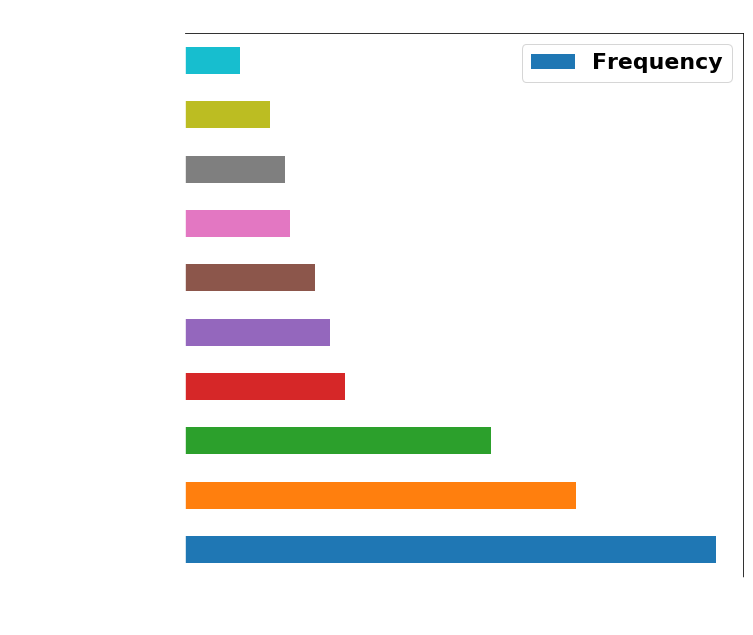

In [34]:


word_count_countries.iloc[0:10].plot(x='Word',y='Frequency',kind='barh',align='edge')
plt.xlabel('Number of Times Referenced')
plt.ylabel('Country')
ax=plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
plt.title('Countries Referenced in Trumps\' Tweets',color='white',)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)



plt.show()




In [ ]:
word_count_countries.head(10)